<a href="https://colab.research.google.com/github/janinerottmann/Drillhole-Inspection/blob/master/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hyperparameter Tuning

This notebook visualizes the decision boundries of the Support Vector Machine, Multilayer Perceptron, Random Forest and K-Nearest Neighbors classifiers based on three synthetic datasets and makes a performance comparison between classification with default values and Hyperparameter Tuning.

The source code is based on: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

## Visualization of decision boundaries without Hyperparameter Tuning

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


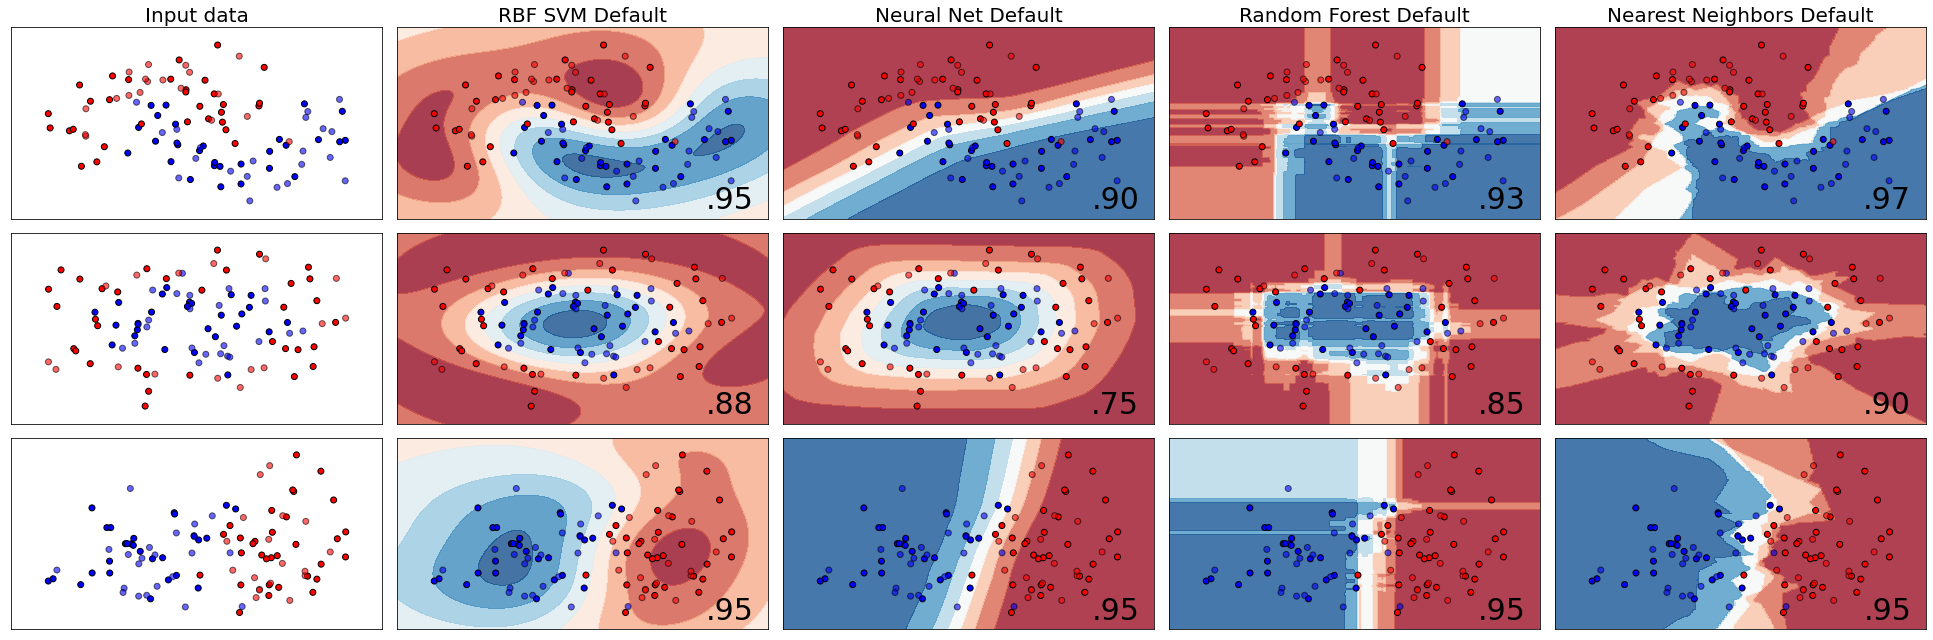

In [2]:
h = .02  # step size in the mesh

names = ["RBF SVM Default",
         "Neural Net Default",  
         "Random Forest Default",
         "Nearest Neighbors Default"]

classifiers = [SVC(),
               MLPClassifier(),
               RandomForestClassifier(),
               KNeighborsClassifier()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", size = 20)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, size=20)
        ax.text(xx.max() - .2, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=30, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## Visualization of decision boundaries with Hyperparameter Tuning

In [3]:
def algorithm_pipeline(x_train, y_train, model, param_grid, name):
    grid = GridSearchCV(estimator=model,
                        param_grid=param_grid, 
                        cv=2, 
                        n_jobs=-1, 
                        scoring='accuracy',
                        verbose=0)
    grid.fit(x_train, y_train)
    best_param = grid.best_params_
    return best_param

In [4]:
#parameters for tuning

svm = {'C': [1,2,3,4,5,6,7,8,9,10],  # default = 1
       'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} #default = scale: 1

mlp = {'solver': ['sgd', 'adam', 'lbfgs'], #default = adam
       'alpha': [0.001, 0.01, 0.05], # default = 0.001
       'learning_rate': ['constant','adaptive'], # default = constant
       'max_iter': [100, 200, 300, 400, 500]} #default = 200

rf = {'n_estimators': [50,100,150,200], # default = 100
      'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]} #default = 1

knn = {'n_neighbors': [3,4,5,6,7,8,9,10], # default = 5
       'leaf_size' : [10,15,20,25,30,35,40,45,50], #default = 30
       'p': [1,2]} #default = 2

params = [svm, mlp, rf, knn]

{'C': 1, 'gamma': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'alpha': 0.05, 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
{'min_samples_leaf': 1, 'n_estimators': 50}
{'leaf_size': 10, 'n_neighbors': 3, 'p': 1}
{'C': 5, 'gamma': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'min_samples_leaf': 1, 'n_estimators': 50}
{'leaf_size': 10, 'n_neighbors': 5, 'p': 1}
{'C': 10, 'gamma': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'alpha': 0.01, 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'sgd'}
{'min_samples_leaf': 1, 'n_estimators': 150}
{'leaf_size': 10, 'n_neighbors': 4, 'p': 1}


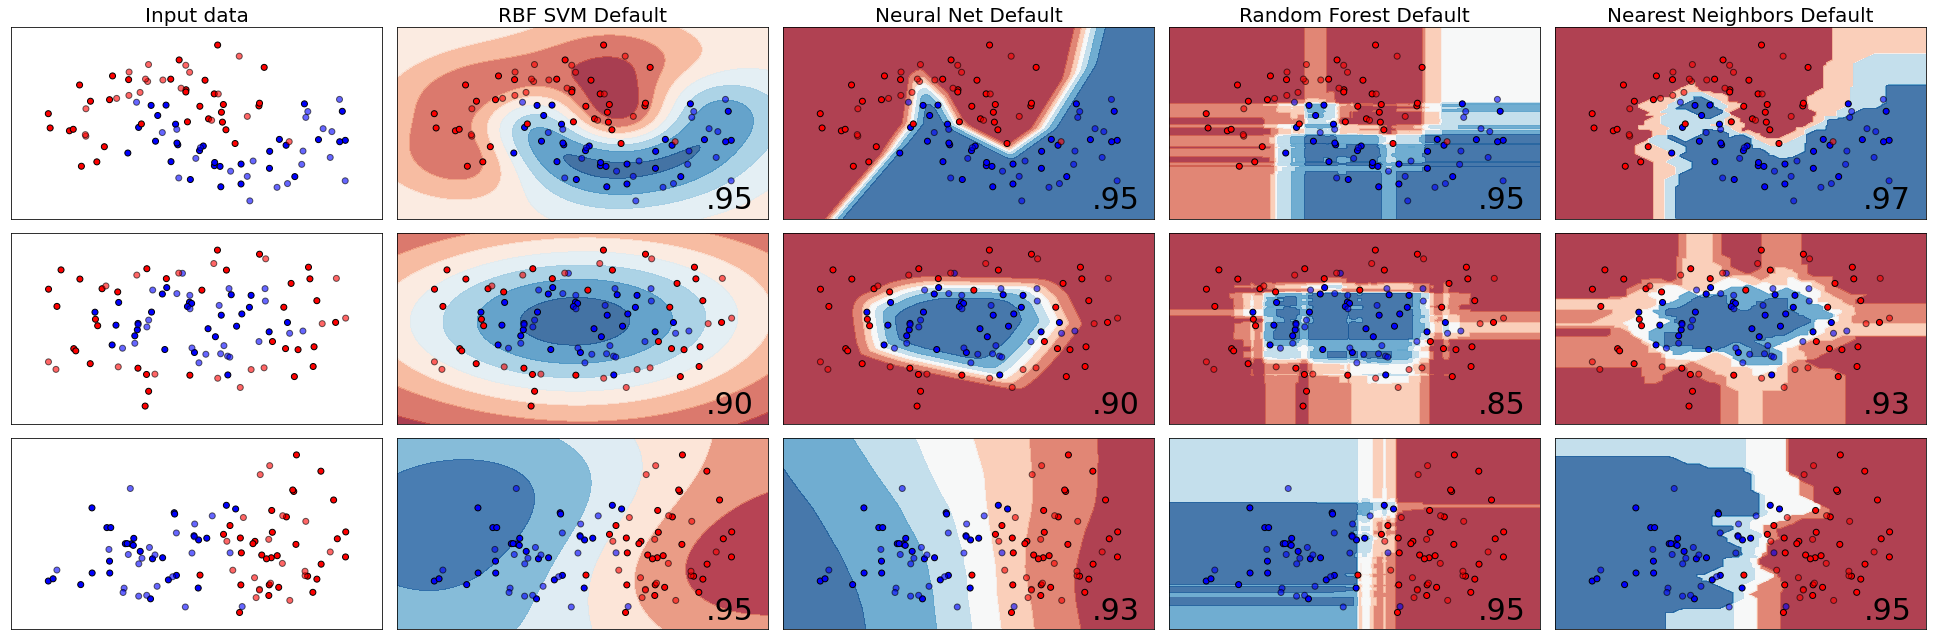

In [5]:
h = .02  # step size in the mesh

names = ["RBF SVM Default",
         "Neural Net Default",  
         "Random Forest Default",
         "Nearest Neighbors Default"]

classifiers = [SVC(),
               MLPClassifier(),
               RandomForestClassifier(),
               KNeighborsClassifier()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data", size = 20)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf, param in zip(names, classifiers, params):
      best_params = algorithm_pipeline(X_train, y_train, clf, param, name)
      for key, variable in best_params.items():
        setattr(clf, key, variable)
      print(best_params)
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test)
      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      if hasattr(clf, "decision_function"):
          Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
      else:
          Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                  edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                  edgecolors='k', alpha=0.6)

      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      if ds_cnt == 0:
          ax.set_title(name, size=20)
      ax.text(xx.max() - .2, yy.min() + .3, ('%.2f' % score).lstrip('0'),
              size=30, horizontalalignment='right')
      i += 1

plt.tight_layout()
plt.show()